In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Let's import the data

In [2]:
telecom = pd.read_csv(r'C:\Users\dell\Downloads\telecom_churn_data.csv')

In [3]:
telecom.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
5,7000286308,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,50.258,...,0,NaN,NaN,NaN,NaN,1471,0.00,0.00,0.00,0.00
6,7001051193,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,429.023,...,0,NaN,NaN,NaN,NaN,1673,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,119.518,...,0,NaN,1.0,NaN,NaN,902,0.00,0.00,0.00,0.00


In [4]:
telecom.shape

(99999, 226)

In [5]:
telecom.isnull().any()

mobile_number     False
circle_id         False
loc_og_t2o_mou     True
std_og_t2o_mou     True
loc_ic_t2o_mou     True
                  ...  
aon               False
aug_vbc_3g        False
jul_vbc_3g        False
jun_vbc_3g        False
sep_vbc_3g        False
Length: 226, dtype: bool

In [6]:
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 226, dtype: float64

In [7]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 167.8+ MB


In [8]:
# create Churn data

telecom_1 = telecom
telecom_1['total_rech_amt_good_phase'] = (telecom_1['total_rech_amt_6'] + telecom_1['total_rech_amt_7'])/2
telecom_1 = telecom_1[telecom_1['total_rech_amt_good_phase'] > telecom_1['total_rech_amt_good_phase'].quantile(0.70)]

telecom_1['total_usage_col'] = telecom_1['total_og_mou_9'] + telecom_1['total_ic_mou_9'] + telecom_1['vol_2g_mb_9'] + telecom_1['vol_3g_mb_9']

telecom_1['churn'] = np.where(telecom_1['total_usage_col']== 0, 1, 0)
telecom_1['churn'].value_counts()

<ipython-input-8-d189c895899a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_1['total_usage_col'] = telecom_1['total_og_mou_9'] + telecom_1['total_ic_mou_9'] + telecom_1['vol_2g_mb_9'] + telecom_1['vol_3g_mb_9']
<ipython-input-8-d189c895899a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_1['churn'] = np.where(telecom_1['total_usage_col']== 0, 1, 0)


0    27390
1     2589
Name: churn, dtype: int64

In [9]:
telecom_f1 = telecom_1.drop(['total_rech_amt_good_phase','total_usage_col'],1)

As per the analysis scope dropping all the variables of the 9th month after the churn indicator creation

In [10]:
colum9 = [col for col in telecom_1.columns if '_9' in col]
print(telecom_1.shape)
telecom_1 = telecom_1.drop(colum9, axis = 1)
print(telecom_1.shape)
telecom_1 = telecom_1.drop('sep_vbc_3g', axis=1)

(29979, 229)
(29979, 175)


Let's calculate churn rate:

In [11]:
y = telecom_1['churn']
churn = (sum(y)/len(y.index))*100
print("churn= ",churn)

churn=  8.636045231662164


In [12]:
telecom_1.shape

(29979, 174)

In [13]:
telecom_1.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_good_phase,total_usage_col,churn
count,2.997900e+04,29979.0,29865.0,29865.0,29865.0,29979.000000,29979.000000,29979.000000,29663.000000,29676.000000,...,11387.000000,11652.000000,11741.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,7.001223e+09,109.0,0.0,0.0,0.0,587.587624,589.424681,535.067748,299.392147,307.701888,...,0.897603,0.889804,0.837322,1264.158911,129.482436,135.225368,121.450911,697.014644,1174.536658,0.08636
std,6.846594e+05,0.0,0.0,0.0,0.0,442.848876,463.049067,492.447887,462.369385,483.432401,...,0.303184,0.313147,0.369087,975.181038,390.625027,408.218570,389.910814,488.925223,1232.899316,0.28090
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,369.000000,0.000000,0.00000
25%,7.000641e+09,109.0,0.0,0.0,0.0,364.352500,365.235000,289.782000,43.030000,42.775000,...,1.000000,1.000000,1.000000,480.000000,0.000000,0.000000,0.000000,450.000000,425.830000,0.00000
50%,7.001232e+09,109.0,0.0,0.0,0.0,495.951000,493.781000,452.232000,128.480000,128.120000,...,1.000000,1.000000,1.000000,914.000000,0.000000,0.000000,0.000000,569.000000,893.470000,0.00000
75%,7.001814e+09,109.0,0.0,0.0,0.0,704.184500,700.986000,671.349500,357.655000,365.127500,...,1.000000,1.000000,1.000000,1923.500000,1.600000,2.025000,0.000000,796.000000,1564.350000,0.00000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,1.000000,1.000000,1.000000,4321.000000,12916.220000,9165.600000,11166.210000,37762.500000,39227.890000,1.00000


In [14]:
round(100*(telecom_1.isnull().sum()/len(telecom_1.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.38
std_og_t2o_mou               0.38
loc_ic_t2o_mou               0.38
                             ... 
jul_vbc_3g                   0.00
jun_vbc_3g                   0.00
total_rech_amt_good_phase    0.00
total_usage_col              0.00
churn                        0.00
Length: 174, dtype: float64

Let's drop the columns with zero varience as per PCA rules

In [15]:
telecom_2 = telecom_1.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6',
                     'std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7',
                   'std_ic_t2o_mou_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], 1)

In [16]:
#dropping column
column_to_drop = ['fb_user','night_pck_user','arpu_2g','arpu_3g','av_rech_amt_data','count_rech_3g',
'count_rech_2g','max_rech_data','total_rech_data','date_of_last_rech_data']

for s in column_to_drop:
    for month in ['6', '7', '8']:
        column_to_drop = s + '_' + month
        telecom_2 = telecom_2.drop([column_to_drop], 1)
        
print(telecom_2.shape)

(29979, 131)


In [17]:
column_drop = ['date_of_last_rech']

for field in column_drop:
    for month in ['6', '7', '8']:
        column_drop = field + '_' + month
        telecom_2[column_drop].fillna(telecom_2[column_drop].mode()[0], inplace=True)

In [18]:
telecom_2['date_of_last_rech_6'] = pd.to_datetime(telecom_2.date_of_last_rech_6).dt.day
telecom_2['date_of_last_rech_7'] = pd.to_datetime(telecom_2.date_of_last_rech_7).dt.day
telecom_2['date_of_last_rech_8'] = pd.to_datetime(telecom_2.date_of_last_rech_8).dt.day

# Imputing missing observations with Median column value

In [19]:
missing= telecom_2.columns[telecom_2.isnull().sum()>0]
for col in missing:
    telecom_2[col].fillna((telecom_2[col].median()), inplace=True)

In [20]:
round(100*(telecom_2.isnull().sum()/len(telecom_2.index)), 2)

mobile_number                0.0
arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
onnet_mou_6                  0.0
                            ... 
jul_vbc_3g                   0.0
jun_vbc_3g                   0.0
total_rech_amt_good_phase    0.0
total_usage_col              0.0
churn                        0.0
Length: 131, dtype: float64

In [21]:
telecom_3 = telecom_2
telecom_3.shape

(29979, 131)

# Outlier Treatment

In [22]:
telecom_3.describe(percentiles=[0.01, 0.10,.25,.5,0.6,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_good_phase,total_usage_col,churn
count,2.997900e+04,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,7.001223e+09,587.587624,589.424681,535.067748,297.590611,305.886840,271.137938,421.142281,426.990330,383.029940,...,0.138063,0.150339,0.140498,1264.158911,129.482436,135.225368,121.450911,697.014644,1174.536658,0.08636
std,6.846594e+05,442.848876,463.049067,492.447887,460.257092,481.318377,465.205131,468.998414,485.030117,473.464516,...,0.875984,0.969779,0.975212,975.181038,390.625027,408.218570,389.910814,488.925223,1232.899316,0.28090
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,369.000000,0.000000,0.00000
1%,7.000028e+09,18.221200,25.600600,0.000000,0.000000,0.000000,0.000000,1.057800,1.099000,0.000000,...,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,371.500000,0.000000,0.00000
10%,7.000269e+09,270.692200,274.458200,134.118600,12.230000,11.726000,6.906000,58.606000,59.604000,35.072000,...,0.000000,0.000000,0.000000,294.000000,0.000000,0.000000,0.000000,397.000000,26.160000,0.00000
25%,7.000641e+09,364.352500,365.235000,289.782000,43.590000,43.370000,34.060000,142.860000,141.280000,111.780000,...,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,450.000000,425.830000,0.00000
50%,7.001232e+09,495.951000,493.781000,452.232000,128.480000,128.120000,106.390000,285.990000,285.630000,251.530000,...,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,569.000000,893.470000,0.00000
60%,7.001458e+09,560.864000,561.054400,526.215800,183.662000,186.790000,150.604000,357.260000,359.796000,314.776000,...,0.000000,0.000000,0.000000,1183.800000,0.000000,0.000000,0.000000,638.500000,1110.270000,0.00000
75%,7.001814e+09,704.184500,700.986000,671.349500,353.500000,360.360000,298.215000,523.625000,532.905000,483.000000,...,0.000000,0.000000,0.000000,1923.500000,1.600000,2.025000,0.000000,796.000000,1564.350000,0.00000


In [23]:
count_cols = [col for col in telecom_3.columns if col not in ['churn','mobile_number']]

for col in count_cols:
    percentiles = telecom_3[col].quantile([0.01,0.99]).values
    telecom_3[col][telecom_3[col] <= percentiles[0]] = percentiles[0]
    telecom_3[col][telecom_3[col] >= percentiles[1]] = percentiles[1]

<ipython-input-23-315f811d4564>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_3[col][telecom_3[col] <= percentiles[0]] = percentiles[0]
<ipython-input-23-315f811d4564>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_3[col][telecom_3[col] >= percentiles[1]] = percentiles[1]
<ipython-input-23-315f811d4564>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telecom_3[col][telecom_3[col] <= percentiles[0]] = percentiles[0

In [24]:
telecom_3.shape

(29979, 131)

In [25]:
telecom_3.info

<bound method DataFrame.info of        mobile_number    arpu_6     arpu_7      arpu_8  onnet_mou_6  \
7         7000701601  1069.180  1349.8500  1988.08226        57.84   
8         7001524846   378.721   492.2230   137.36200       413.69   
13        7002191713   492.846   205.6710   593.26000       501.76   
16        7000875565   430.975   299.8690   187.89400        50.51   
17        7000187447   690.008    25.6006    25.49900      1185.91   
...              ...       ...        ...         ...          ...   
99970     7001386760   261.269   410.6140   290.85100         5.01   
99974     7001453306   414.303   321.0930   371.01600        17.56   
99986     7001729035   644.973   455.2280   564.33400       806.73   
99988     7002111859   312.558   512.9320   402.08000       199.89   
99997     7000498689   322.991   303.3860   606.81700         0.00   

       onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7            54.68        52.29      453.4300     

In [26]:
telecom_3.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_good_phase,total_usage_col,churn
count,2.997900e+04,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,...,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000
mean,7.001223e+09,578.115790,579.934200,524.618925,288.909740,296.580898,261.866393,413.363109,418.408660,373.082685,...,0.100304,0.103239,0.093966,1263.461223,120.468609,126.130999,112.271333,686.128273,1151.077171,0.08636
std,6.846594e+05,336.036348,338.202040,370.788082,404.375323,419.262037,398.634242,420.037947,429.176148,401.058913,...,0.427528,0.442786,0.431060,973.137375,318.585454,337.364761,313.189126,347.666592,1064.742493,0.28090
min,7.000000e+09,18.221200,25.600600,0.000000,0.000000,0.000000,0.000000,1.057800,1.099000,0.000000,...,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,371.500000,0.000000,0.00000
1%,7.000028e+09,18.228064,25.732732,0.000000,0.000000,0.000000,0.000000,1.059516,1.107580,0.000000,...,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,371.500000,0.000000,0.00000
10%,7.000269e+09,270.692200,274.458200,134.118600,12.230000,11.726000,6.906000,58.606000,59.604000,35.072000,...,0.000000,0.000000,0.000000,294.000000,0.000000,0.000000,0.000000,397.000000,26.160000,0.00000
25%,7.000641e+09,364.352500,365.235000,289.782000,43.590000,43.370000,34.060000,142.860000,141.280000,111.780000,...,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,450.000000,425.830000,0.00000
50%,7.001232e+09,495.951000,493.781000,452.232000,128.480000,128.120000,106.390000,285.990000,285.630000,251.530000,...,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,569.000000,893.470000,0.00000
75%,7.001814e+09,704.184500,700.986000,671.349500,353.500000,360.360000,298.215000,523.625000,532.905000,483.000000,...,0.000000,0.000000,0.000000,1923.500000,1.600000,2.025000,0.000000,796.000000,1564.350000,0.00000
90%,7.002167e+09,994.311800,996.051400,985.499200,795.354000,825.486000,724.182000,916.490000,935.716000,854.006000,...,0.000000,0.000000,0.000000,2846.000000,439.100000,455.078000,395.168000,1118.100000,2491.382000,0.00000


Creating derived colums
Average values of 3 months for each attributes were created to check if that value could address all the months.
Median value of Internet usage (2G + 3G) across months was created to capture the churn rate as it was observed majority of the churn happens when the internet usage pattern shows a decline
The AON variable was used to create tenure buckets. It was observed larger the tenure, lesser was the churn - as customers who are newly acquired to the network churned more as compared to the old customers.

In [27]:
telecom_3['int_usage_median'] = telecom_3[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']].median(axis=1)
telecom_3['int_usage_median'] = telecom_3.int_usage_median.map(lambda x: 1 if x == 0 else 0)
telecom_3 = telecom_3.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'], 1)


telecom_3['tenure_buck'] = np.round(telecom_3['aon']/365,1)
bins = [0, 1, 2, 3, 4, 10]
telecom_3['tenure_buck'] = pd.cut(telecom_3['tenure_buck'], bins)
telecom_3['tenure_buck'].value_counts()

(4, 10]    9681
(1, 2]     7486
(0, 1]     5320
(2, 3]     4530
(3, 4]     2962
Name: tenure_buck, dtype: int64

# Correlation Analysis

In [28]:
corr_matrix = telecom_3.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

telecom_3 = telecom_3.drop(to_drop, 1)

In [29]:
telecom_3.tenure_buck.dtype

CategoricalDtype(categories=[(0, 1], (1, 2], (2, 3], (3, 4], (4, 10]],
              ordered=True)

In [30]:
#create dummy for tenure_buck 
telecom_3 = pd.get_dummies(telecom_3, drop_first=True)

In [31]:
telecom_3.rename(columns={"tenure_buck_(1, 2]": "tenure_buck_1_to_2","tenure_buck_(2, 3]":"tenure_buck_2_to_3",
                   "tenure_buck_(3, 4]":"tenure_buck_3_to_4",
                   "tenure_buck_(4, 10]":"tenure_buck_4_to_10"}, inplace=True)

In [32]:
telecom_3.shape

(29979, 73)

In [33]:
# After outlier treatment droping column which don't have much variance or zero variance
telecom_4 = telecom_3.drop(['og_others_7','og_others_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','aon'], 1)

In [34]:
telecom_4.shape

(29979, 67)

# Exploratory data analysis

<ipython-input-35-98a9ba421f51>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5, 5))
<ipython-input-35-98a9ba421f51>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5, 5))
<ipython-input-35-98a9ba421f51>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5, 5))
<

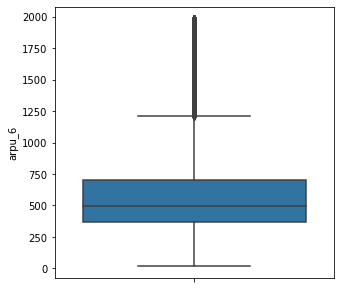

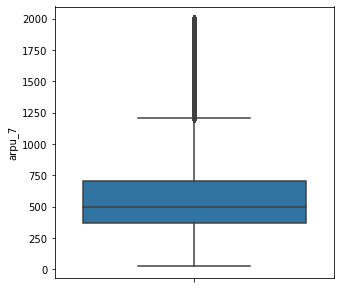

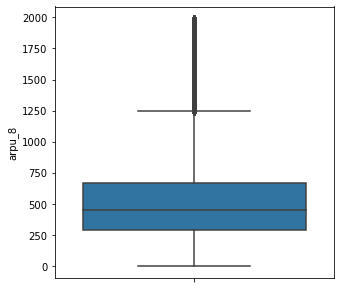

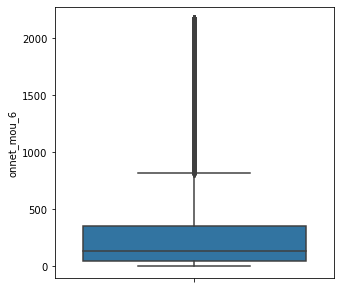

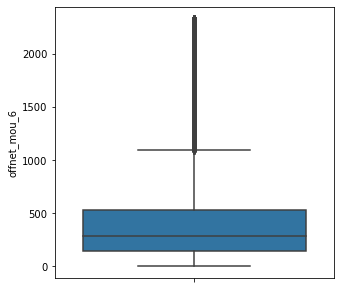

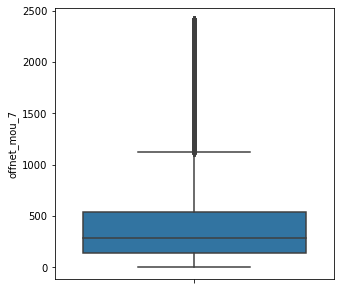

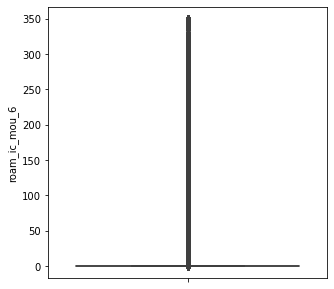

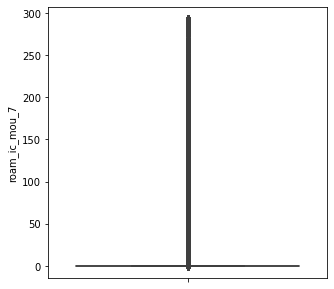

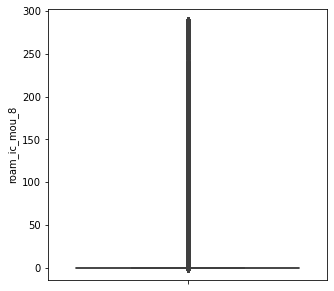

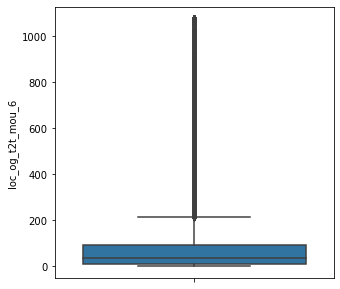

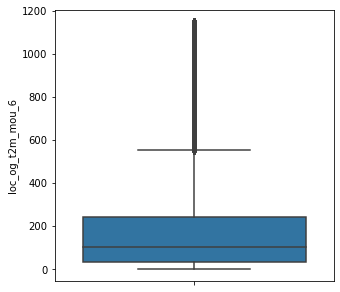

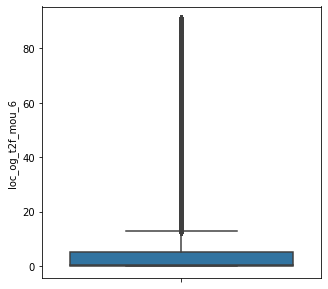

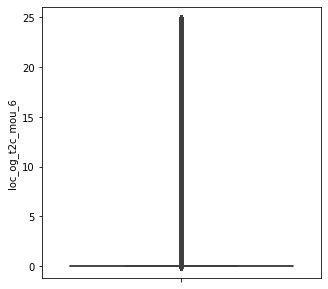

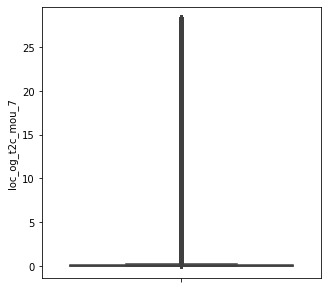

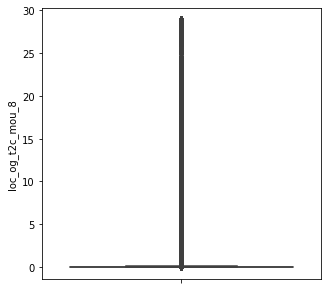

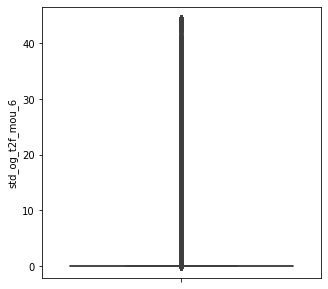

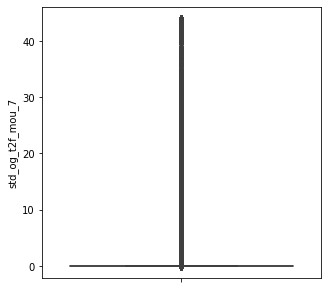

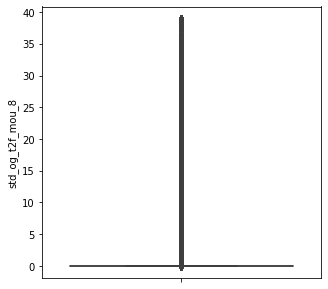

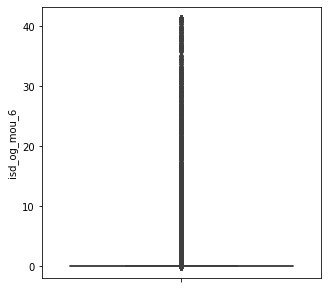

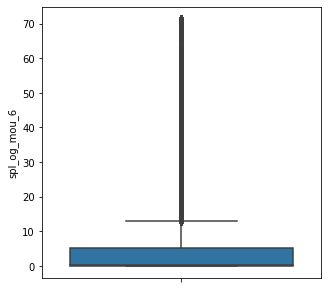

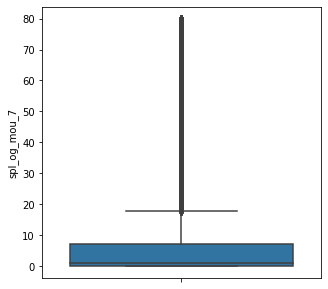

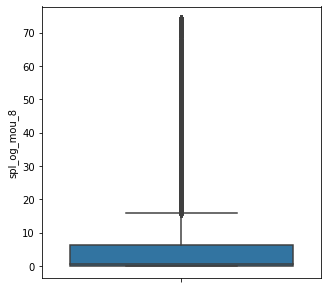

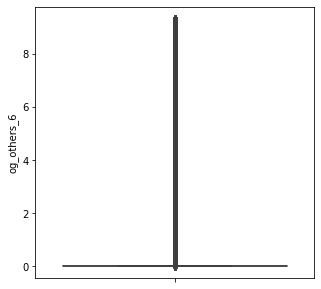

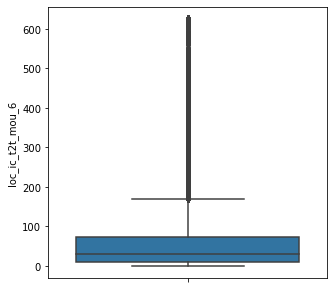

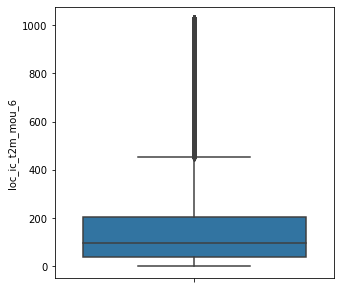

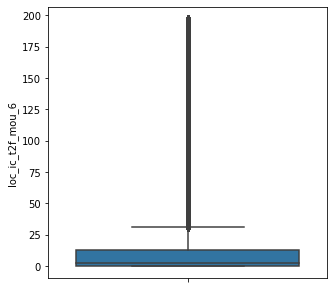

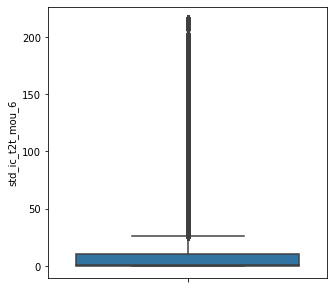

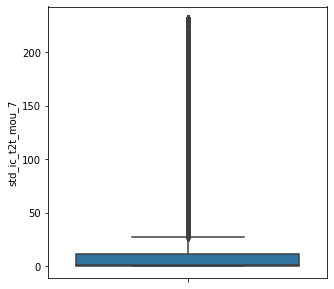

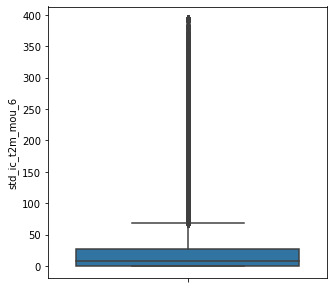

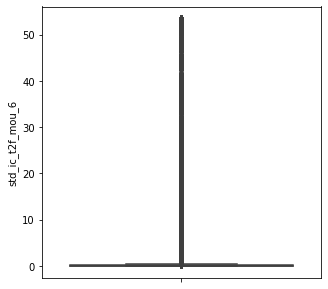

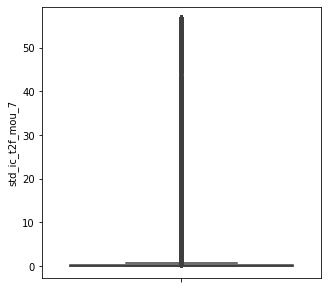

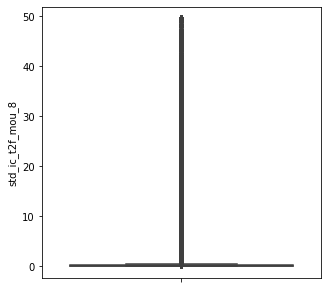

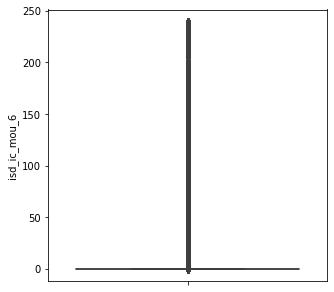

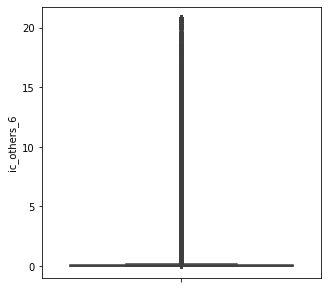

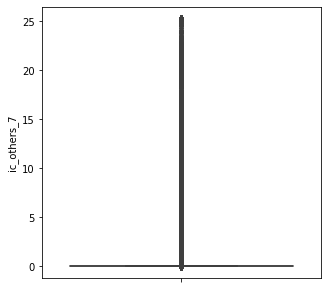

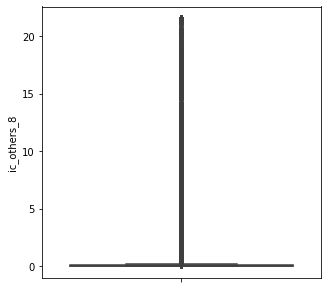

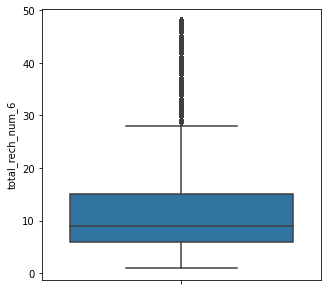

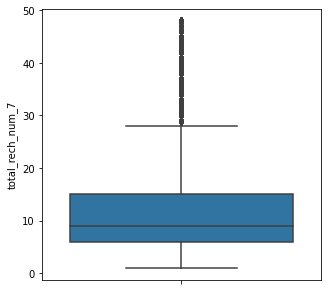

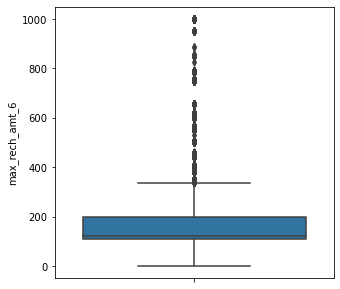

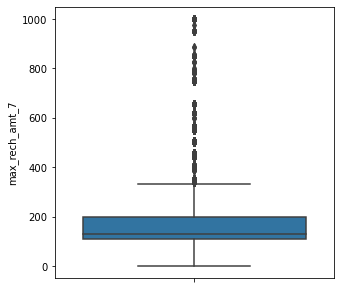

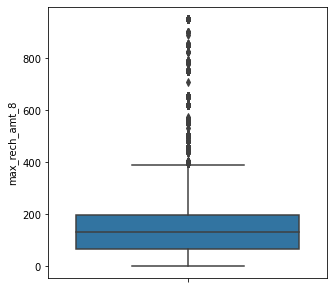

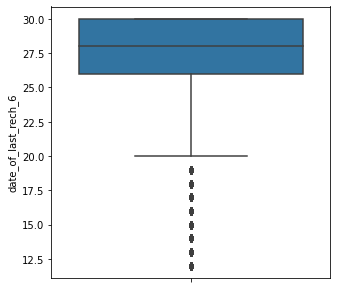

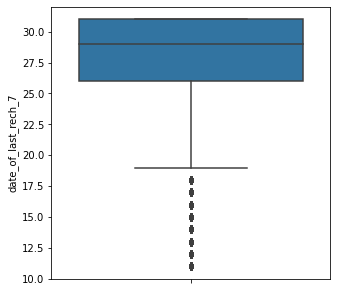

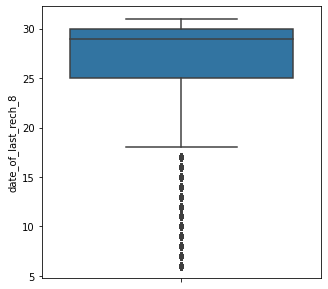

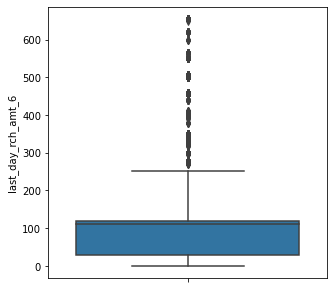

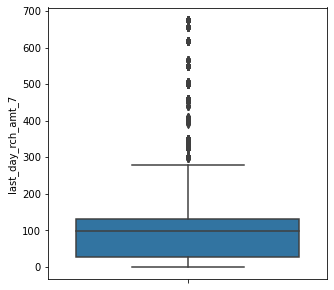

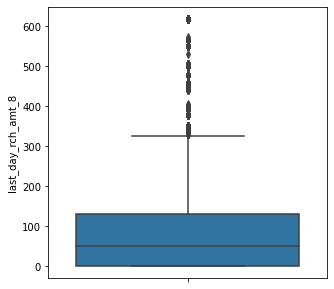

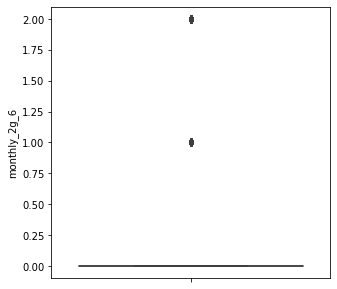

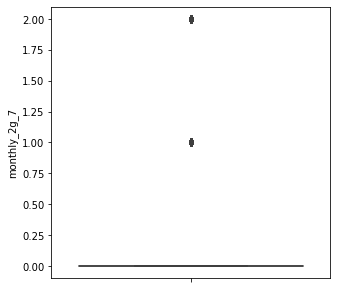

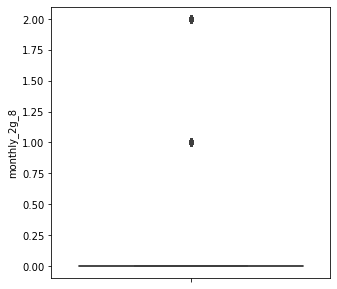

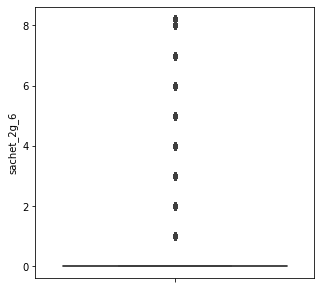

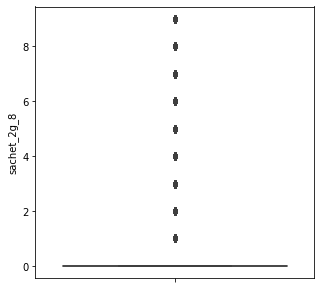

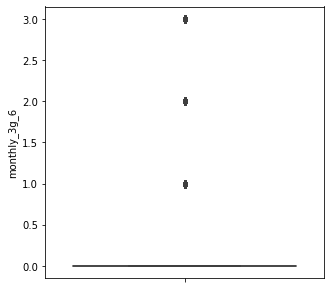

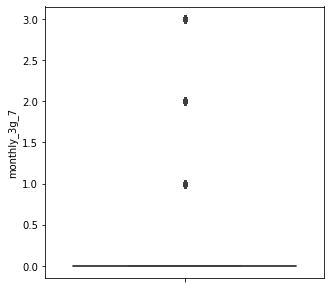

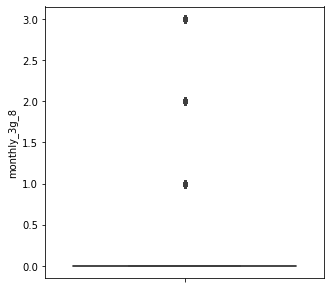

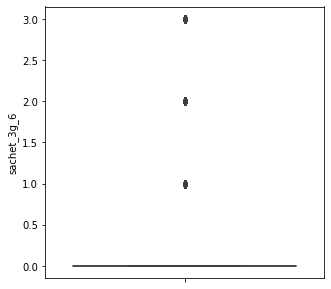

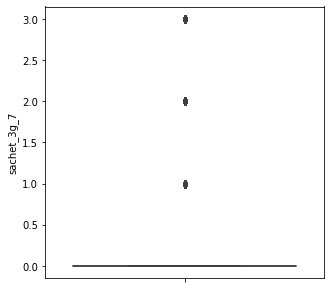

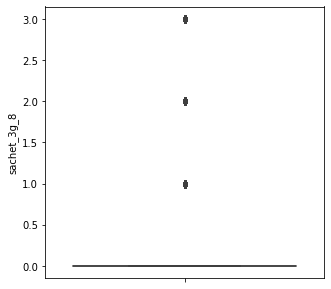

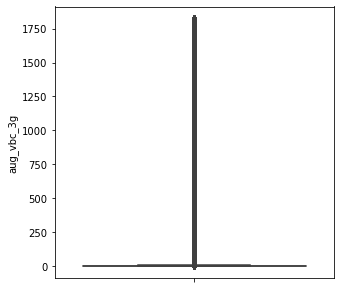

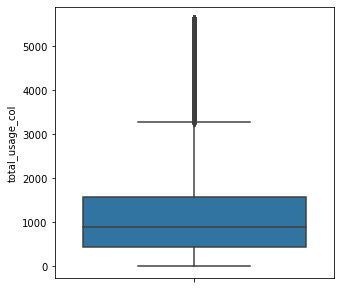

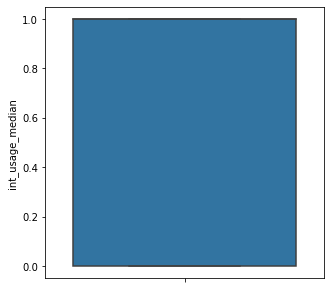

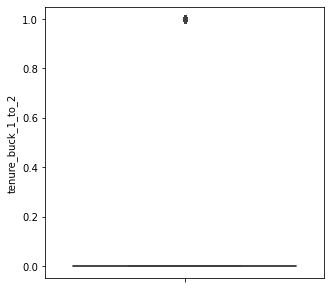

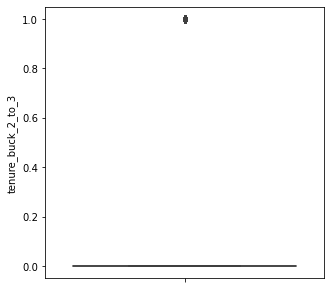

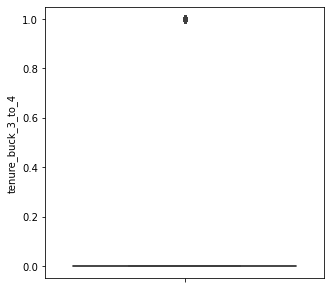

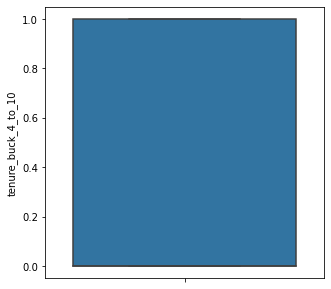

In [35]:
cols = [col for col in telecom_4.columns if col not in ['churn','mobile_number']]
for col in cols:
    plt.figure(figsize=(5, 5))
    colors=["g"]
    sns.boxplot(y=col, data=telecom_4)

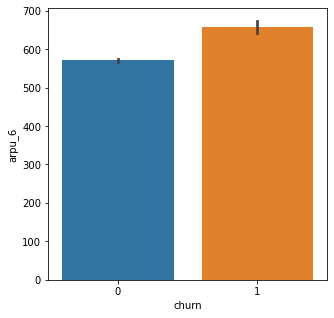

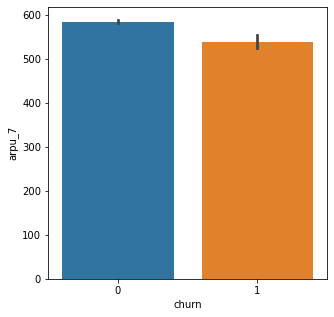

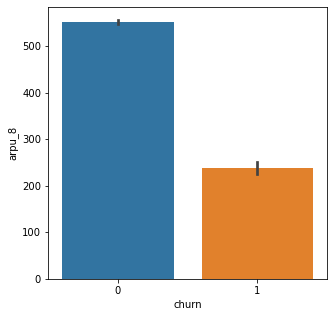

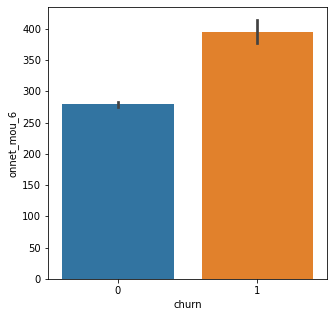

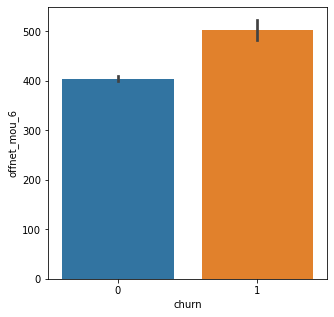

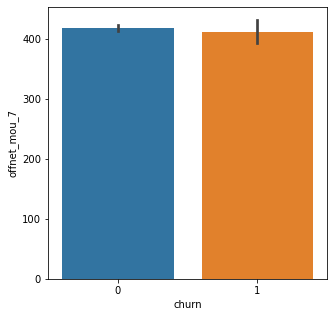

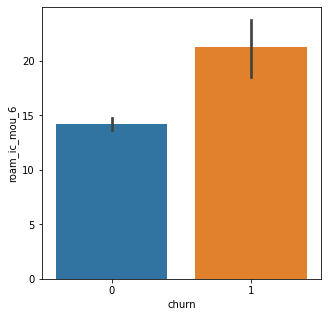

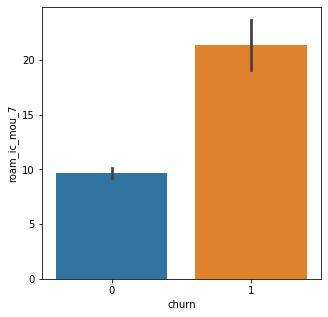

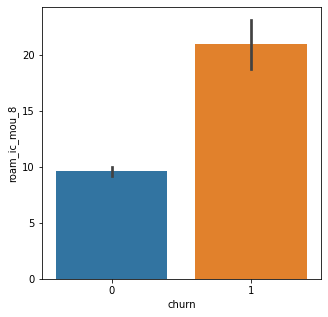

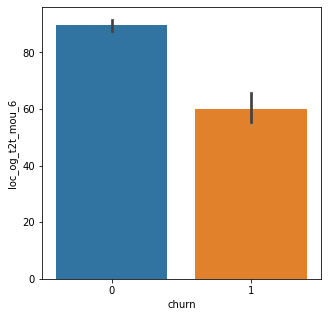

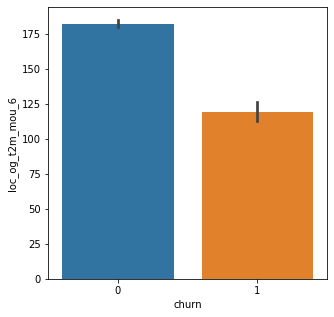

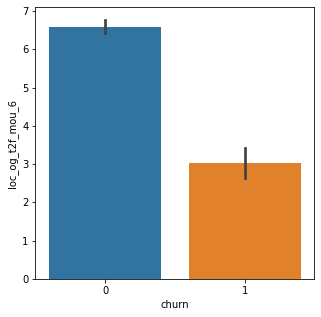

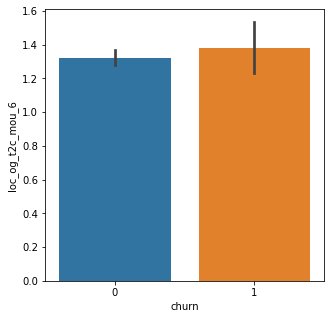

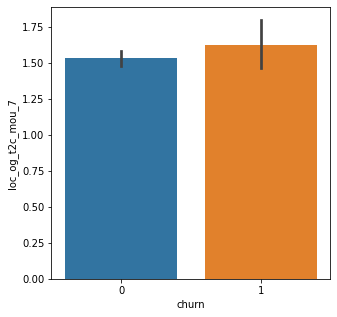

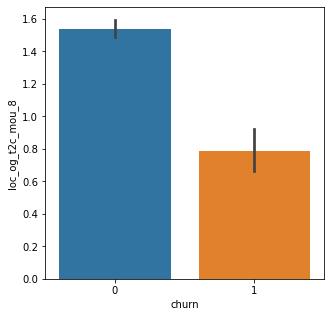

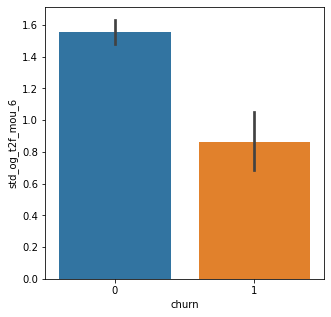

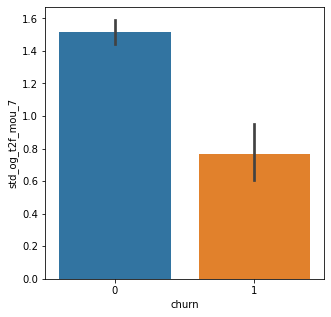

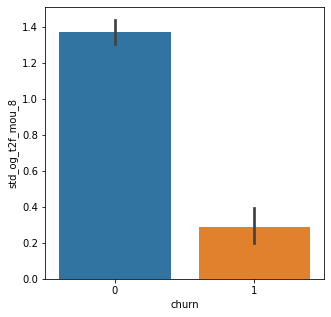

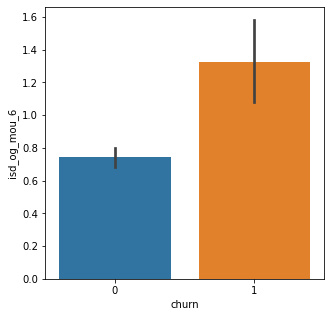

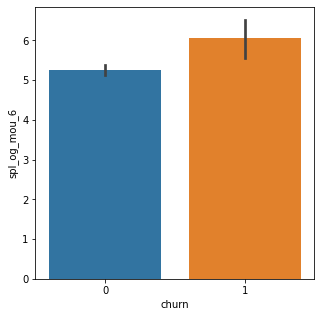

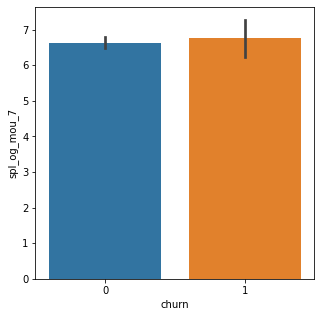

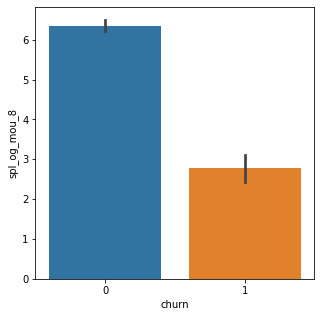

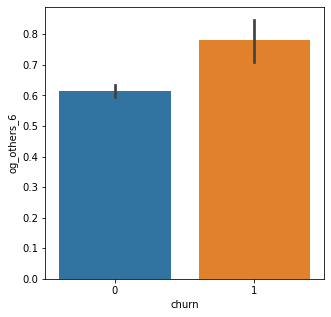

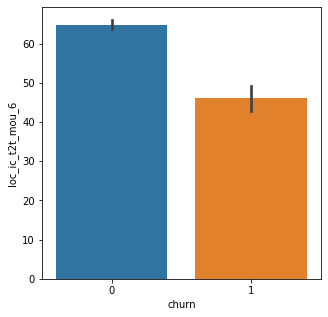

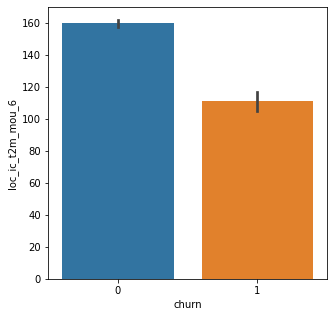

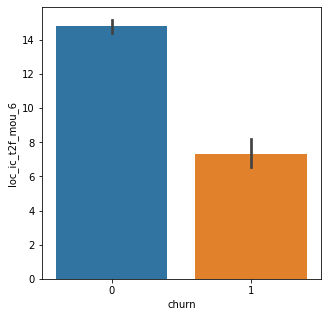

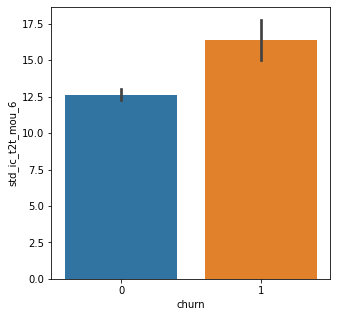

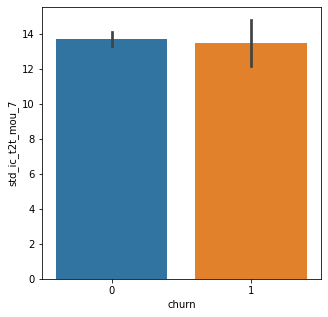

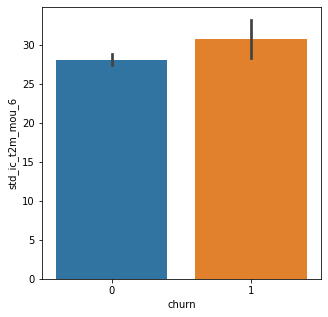

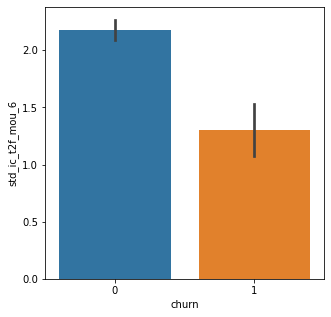

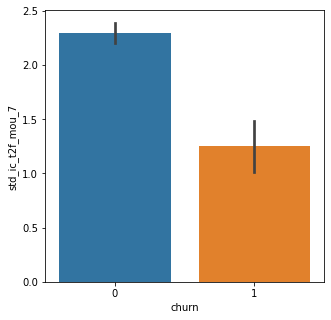

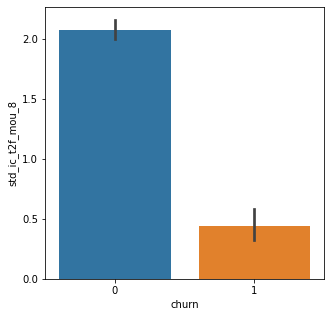

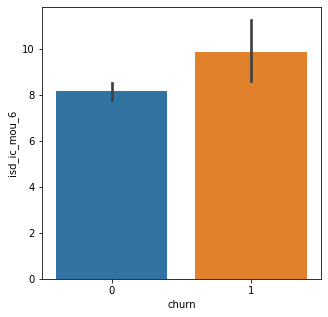

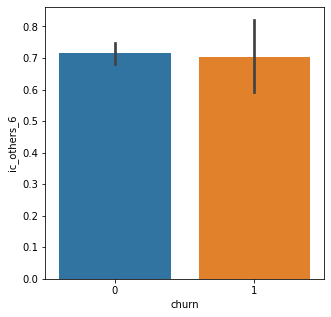

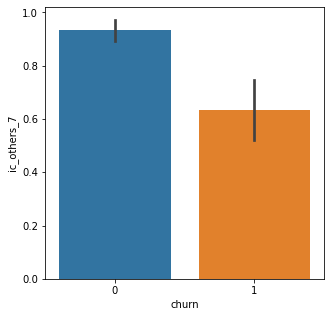

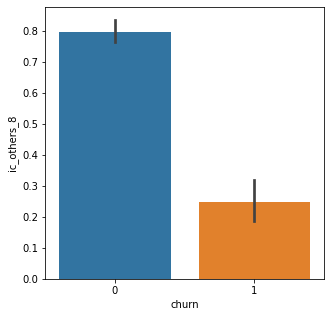

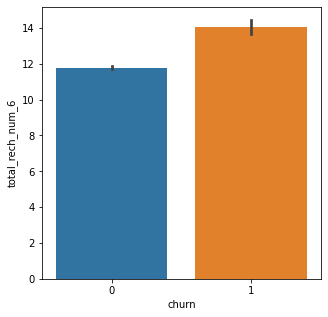

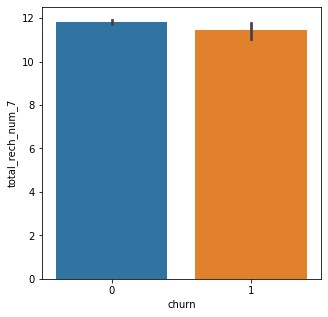

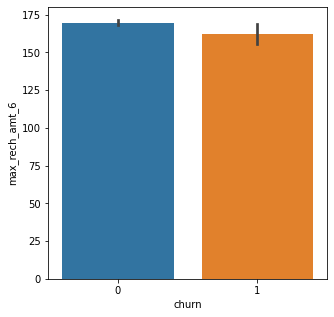

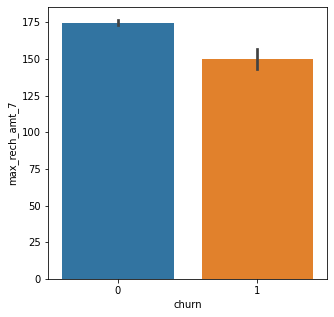

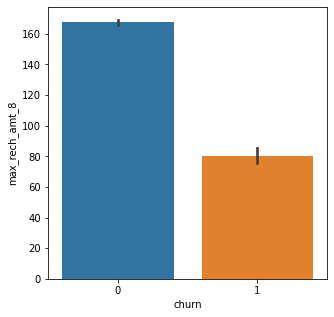

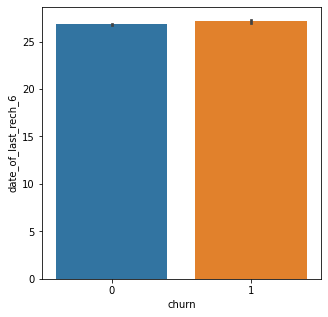

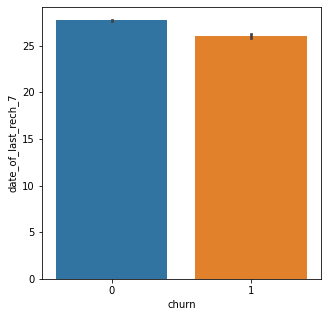

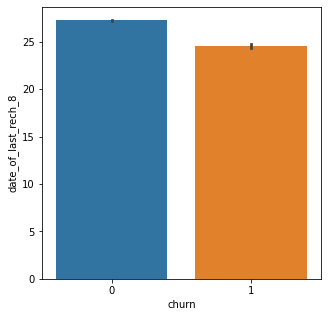

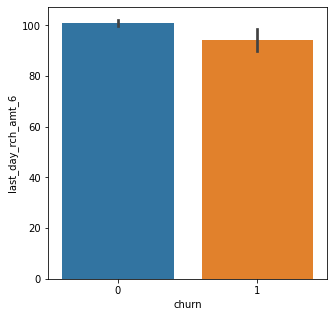

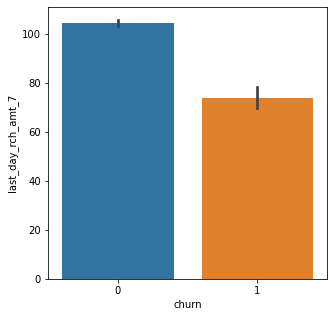

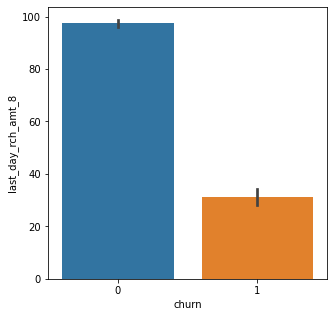

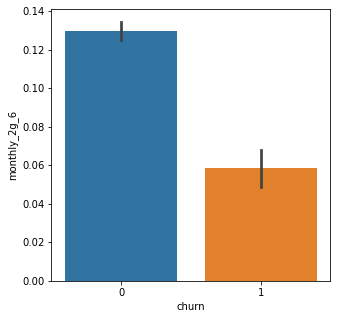

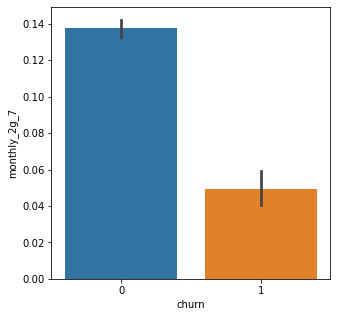

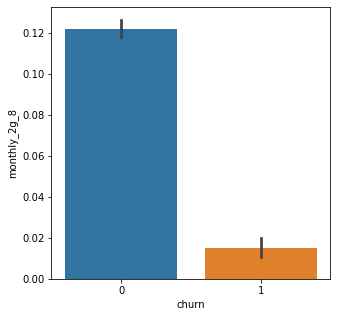

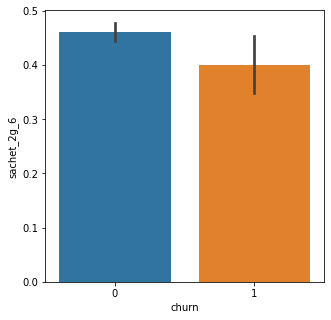

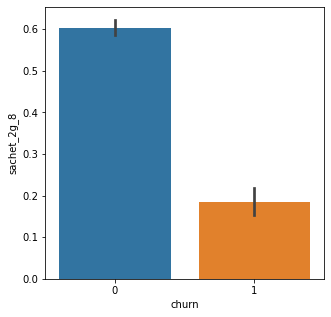

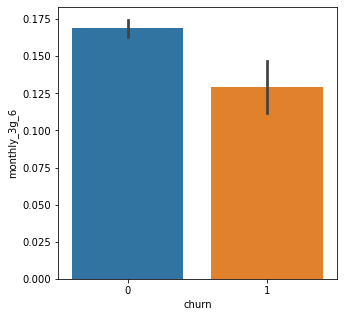

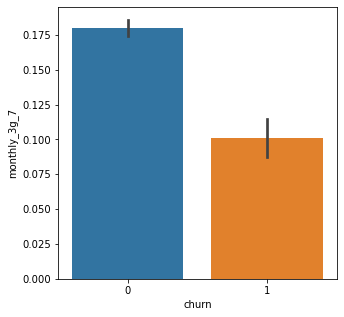

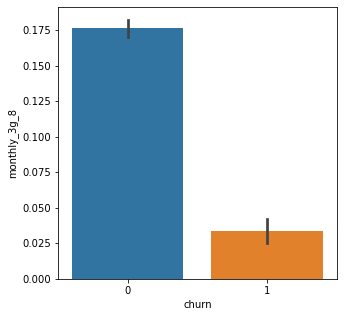

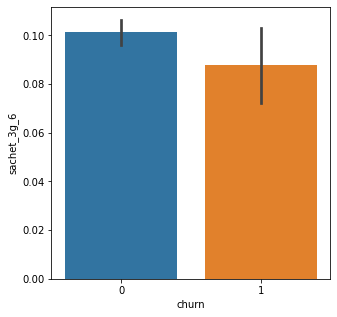

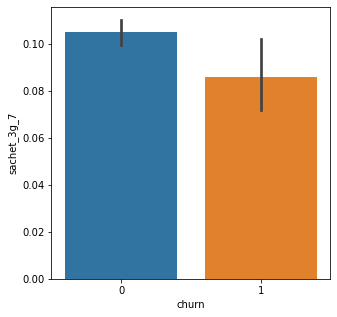

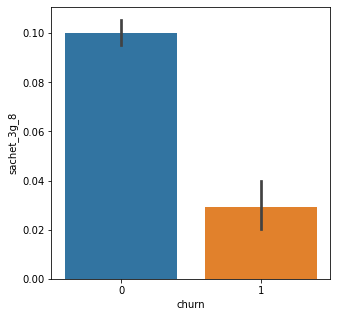

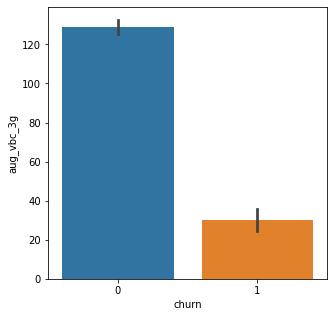

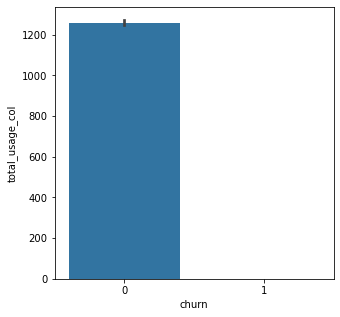

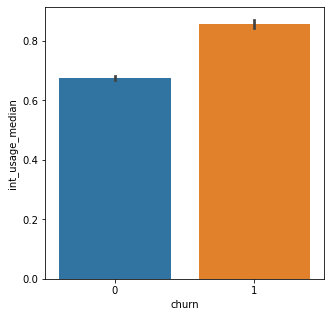

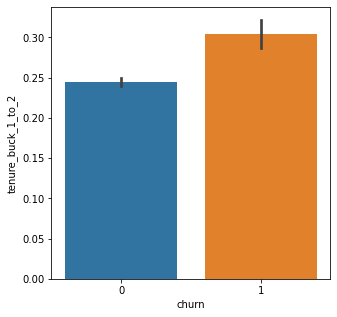

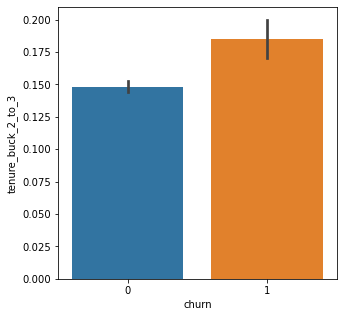

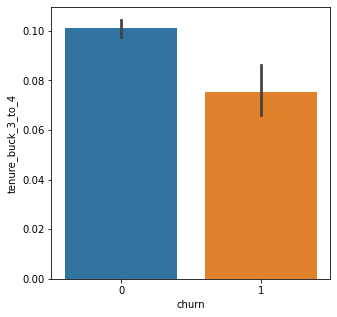

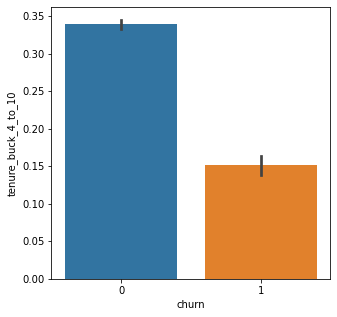

In [36]:
cols = [col for col in telecom_4.columns if col not in ['churn','mobile_number']]
for col in cols:
    plt.figure(figsize=(5, 5))
    colors=["m","y"]
    sns.barplot(x='churn', y=col, data=telecom_4)
    plt.show()

[Text(0, 0.5, '(%)')]

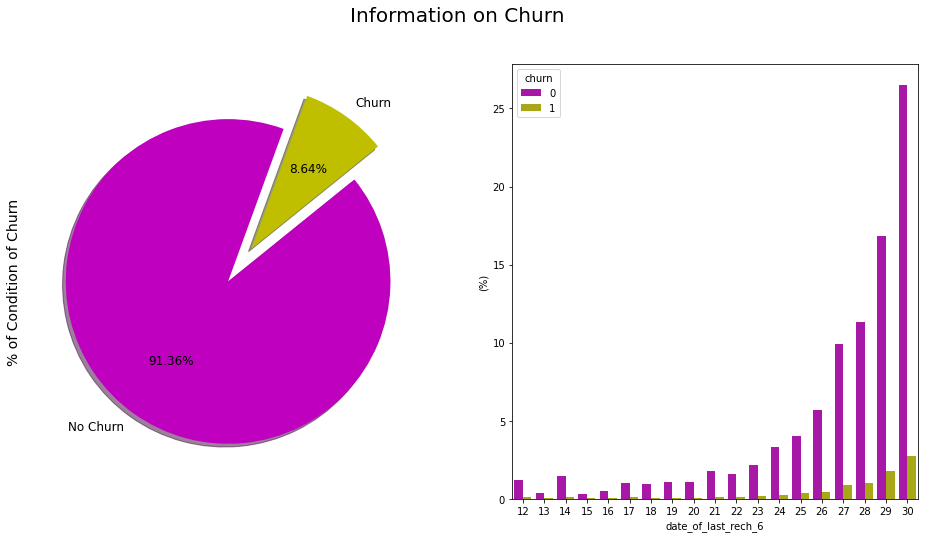

In [37]:
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["m", "y"]

labels ="No Churn", "Churn"
plt.suptitle('Information on Churn', fontsize=20)

telecom_4["churn"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)
ax[0].set_ylabel('% of Condition of Churn', fontsize=14)

palette = ["m", "y"]
sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=telecom_4, palette=palette, estimator=lambda x: len(x) / len(telecom_4) * 100)
ax[1].set(ylabel="(%)")

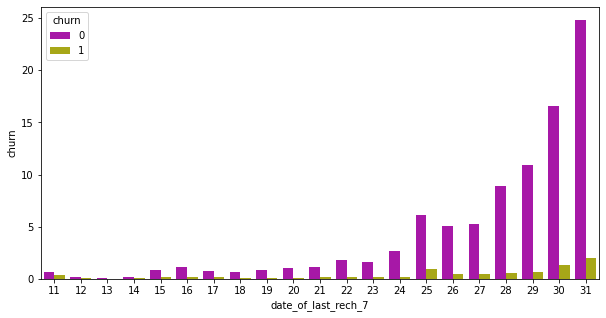

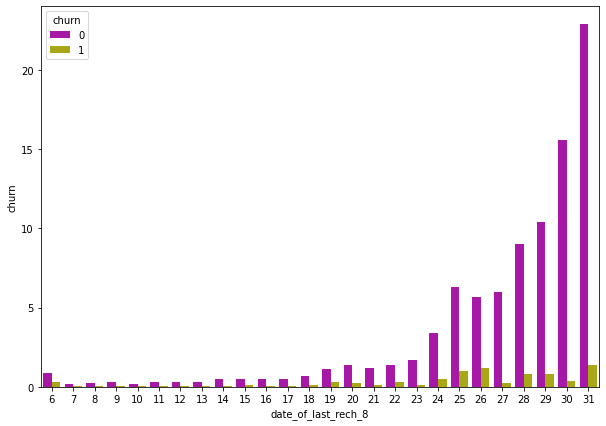

In [38]:
plt.figure(figsize=(10,5))
palette = ["m", "y"]
sns.barplot(x="date_of_last_rech_7", y="churn", hue="churn", data=telecom_4, palette=palette, 
            estimator=lambda x: len(x) / len(telecom_4) * 100)

plt.figure(figsize=(10,7))
palette = ["m", "y"]
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=telecom_4, palette=palette, 
            estimator=lambda x: len(x) / len(telecom_4) * 100)

In [39]:
telecom_4.shape

(29979, 67)

In [40]:
# # Let's see the correlation matrix 
# plt.figure(figsize = (100,100))        # Size of the figure
# sns.heatmap(telecom_df4.corr(),annot = True)
telecom_5 = telecom_4
telecom_5.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,...,sachet_3g_7,sachet_3g_8,aug_vbc_3g,total_usage_col,churn,int_usage_median,tenure_buck_1_to_2,tenure_buck_2_to_3,tenure_buck_3_to_4,tenure_buck_4_to_10
7,7000701601,1069.180,1349.8500,1988.08226,57.84,453.43,567.160,16.23,33.49,31.64,...,0,0,57.74,0.00,1,1,0,1,0,0
8,7001524846,378.721,492.2230,137.36200,413.69,94.66,80.630,0.00,0.00,0.00,...,0,0,21.03,177.09,0,0,0,0,0,0
13,7002191713,492.846,205.6710,593.26000,501.76,413.31,119.280,23.53,144.24,72.11,...,0,0,0.00,1077.95,0,1,0,0,0,1
16,7000875565,430.975,299.8690,187.89400,50.51,296.29,229.740,0.00,2.83,0.00,...,0,0,0.00,590.30,0,1,1,0,0,0
17,7000187447,690.008,25.6006,25.49900,1185.91,61.64,1.099,0.00,4.76,4.81,...,0,0,0.00,718.21,0,1,1,0,0,0


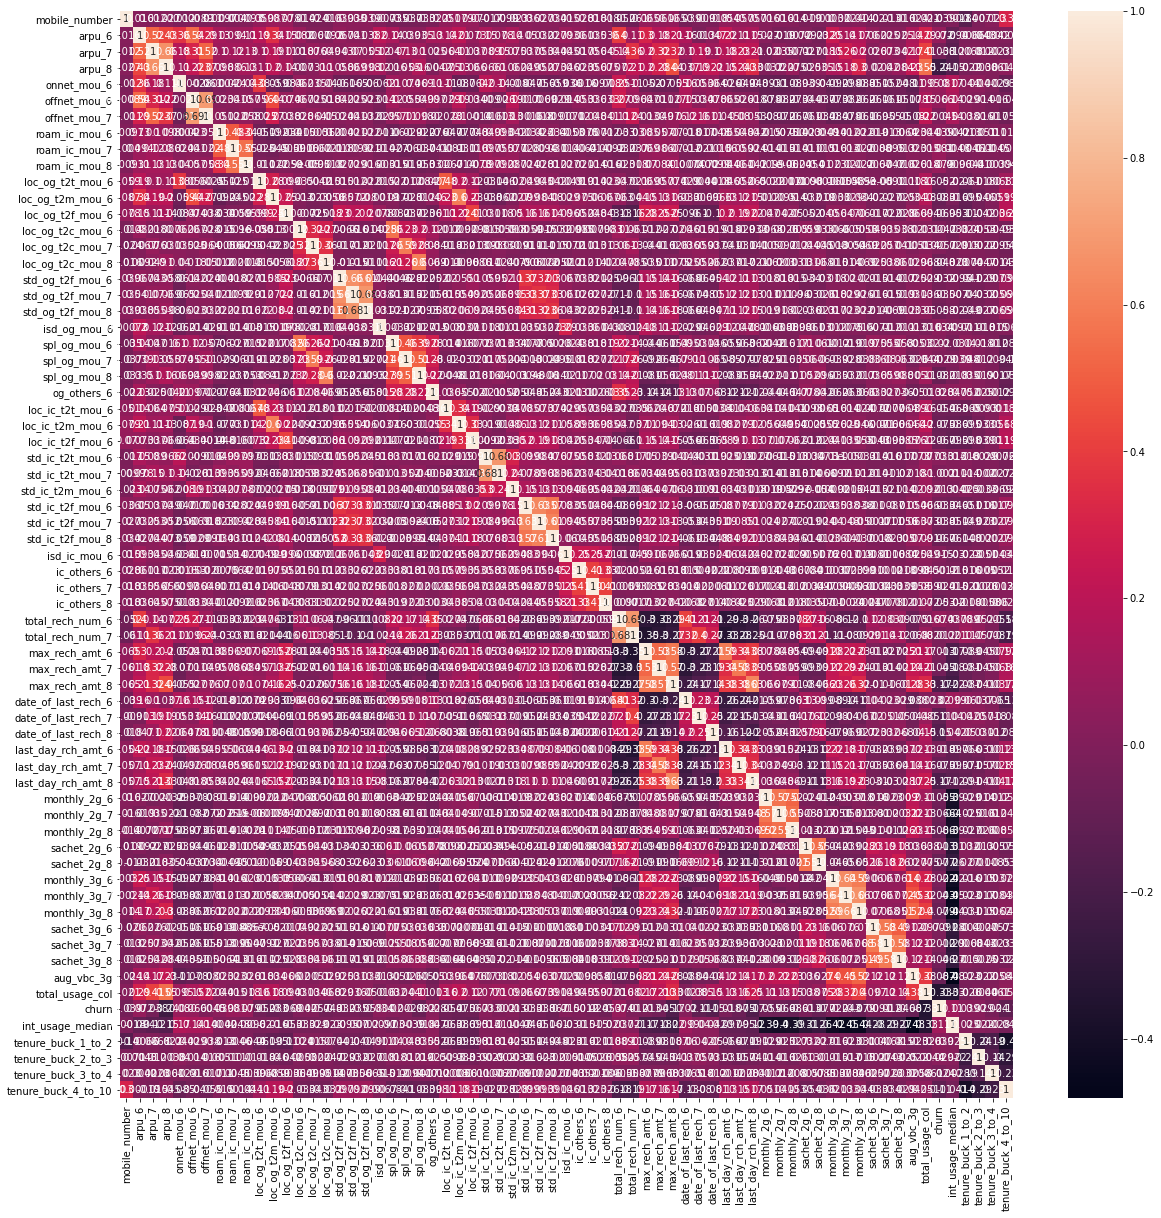

In [41]:
#Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(telecom_5.corr(),annot = True)

# Model building

Lets,split the data into train and test set

In [42]:
from sklearn.model_selection import train_test_split

# lets put feature variable to X
X = telecom_5.drop(['churn','mobile_number'],axis=1)

# Put a response variable to y
y = telecom_5['churn']

# lets difene  a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# apply to all columns 
X_norm = X.apply(normalize) 
X_norm.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,loc_og_t2t_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,total_usage_col,int_usage_median,tenure_buck_1_to_2,tenure_buck_2_to_3,tenure_buck_3_to_4,tenure_buck_4_to_10
7,0.534739,0.670877,1.000000,0.026693,0.194390,0.234889,0.046432,0.114358,0.109657,0.047732,...,0.0,0.0,0.0,0.031678,0.000000,1.0,0.0,1.0,0.0,0.0
8,0.183426,0.236395,0.069093,0.190915,0.040222,0.033002,0.000000,0.000000,0.000000,0.275980,...,0.0,0.0,0.0,0.011538,0.031512,0.0,0.0,0.0,0.0,0.0
13,0.241494,0.091225,0.298408,0.231559,0.177150,0.049040,0.067316,0.492536,0.249916,0.046097,...,0.0,0.0,0.0,0.000000,0.191814,1.0,0.0,0.0,0.0,1.0
16,0.210013,0.138947,0.094510,0.023310,0.126865,0.094876,0.000000,0.009664,0.000000,0.039577,...,0.0,0.0,0.0,0.000000,0.105040,1.0,1.0,0.0,0.0,0.0
17,0.341812,0.000000,0.012826,0.547290,0.026033,0.000000,0.000000,0.016254,0.016670,0.036215,...,0.0,0.0,0.0,0.000000,0.127801,1.0,1.0,0.0,0.0,0.0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=0.7,test_size=0.3,random_state=100)

print("Number of transactions X_train dataset: ", X_train.shape)
print("Number of transactions y_train dataset: ", y_train.shape)
print("Number of  transactions X_test dataset: ", X_test.shape)
print("Number of  transactions y_test dataset: ", y_test.shape)

Number of transactions X_train dataset:  (20985, 65)
Number of transactions y_train dataset:  (20985,)
Number of  transactions X_test dataset:  (8994, 65)
Number of  transactions y_test dataset:  (8994,)


In [44]:
print("Before the OverSampling counts of label '1': {}".format(sum(y_train==1)))
print("Before the OverSampling counts of label '0': {} \n".format(sum(y_train==0)))

Before the OverSampling counts of label '1': 1774
Before the OverSampling counts of label '0': 19211 



In [45]:
print("Before the OverSampling counts of label '1': {}".format(sum(y_test==1)))
print("Before the OverSampling,  counts of label '0': {} \n".format(sum(y_test==0)))

Before the OverSampling counts of label '1': 815
Before the OverSampling,  counts of label '0': 8179 



# PCA

It seems There is a class imbalance in curn event rate
We can add class_weight = 'balanced'
Lets do PCA

In [46]:
#lets improve thethe PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [47]:
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [48]:
print(pca.components_)
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':colnames})
pcs_df.head(10)

[[ 3.35571174e-02  3.91217797e-02  6.68641913e-02 ... -1.06058608e-01
  -3.68479074e-02  6.06943743e-01]
 [ 4.72698186e-02  6.73391610e-02  7.23762484e-02 ...  3.51342875e-02
   2.56571643e-02 -4.57636684e-01]
 [ 1.07253923e-02  1.16006317e-02  6.93275393e-03 ...  6.42005186e-01
   1.67661704e-01 -2.96970932e-01]
 ...
 [ 2.80858791e-01  3.96328547e-01 -3.38548524e-01 ... -4.64636777e-03
  -6.40969586e-03 -6.60061691e-03]
 [ 6.83005238e-02  2.45877272e-01 -9.41057088e-02 ...  3.49209202e-03
   3.67661794e-04 -3.76746663e-04]
 [-5.91147352e-01  4.19309079e-01  2.21571519e-02 ... -7.48029888e-04
   3.38749806e-03  3.85799699e-03]]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Feature
0,0.033557,0.047270,0.010725,0.307188,0.076782,0.029190,-0.035785,-0.060991,-0.040396,-0.171818,arpu_6
1,0.039122,0.067339,0.011601,0.323354,0.086743,0.030131,0.074752,-0.077367,0.157633,0.078070,arpu_7
2,0.066864,0.072376,0.006933,0.330216,0.100267,0.034981,0.090200,-0.092198,0.195676,0.149360,arpu_8
3,-0.063704,-0.022590,0.017198,0.141744,-0.015689,0.014511,0.061243,-0.005386,0.034370,-0.100634,onnet_mou_6
4,-0.030277,-0.025635,0.003793,0.291403,0.057041,0.015622,-0.171007,-0.053437,-0.006729,-0.168455,offnet_mou_6
5,-0.032270,-0.017393,0.002923,0.289614,0.058943,0.018202,-0.084017,-0.056946,0.140656,0.008527,offnet_mou_7
6,0.007103,-0.001213,-0.000389,0.023973,0.043838,0.005751,0.059480,-0.036040,0.081306,0.115419,roam_ic_mou_6
7,0.005344,-0.000955,0.001632,0.024470,0.047821,0.006059,0.036302,-0.033670,0.051900,0.091770,roam_ic_mou_7
8,0.007375,0.003750,0.002040,0.038105,0.044191,0.003261,0.028104,-0.030969,0.050995,0.092277,roam_ic_mou_8
9,0.030077,-0.011124,-0.000815,0.099963,0.004982,0.008259,-0.085223,-0.011786,-0.095336,-0.150855,loc_og_t2t_mou_6


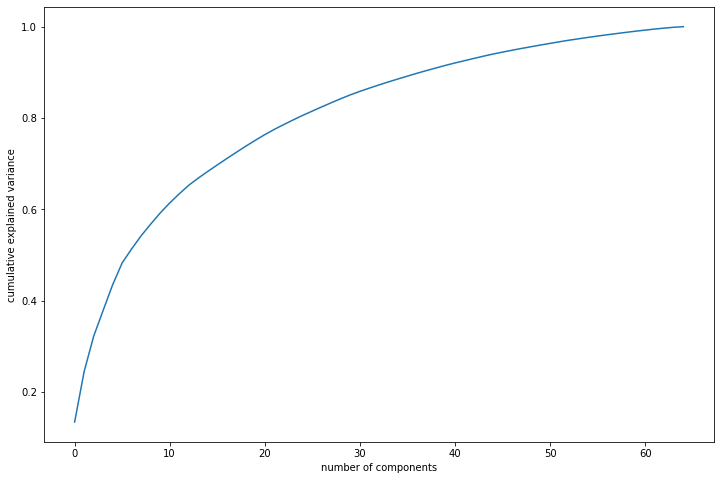

In [49]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

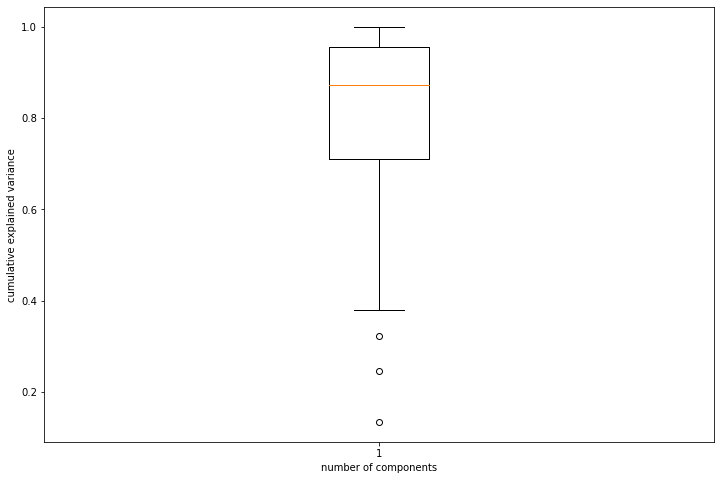

In [50]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.boxplot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

As we can see 40 components explain 90% variance in data.

In [51]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20985, 40)

Let's create correlation matrix for the 40 components

In [52]:
matrix=np.corrcoef(df_train_pca.transpose())

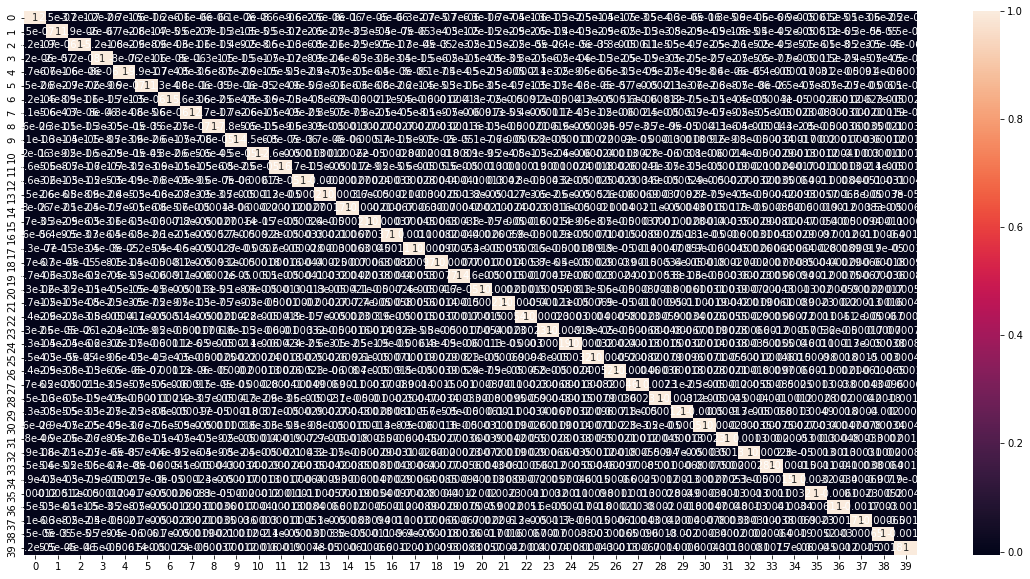

In [53]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(matrix,annot = True)

In [54]:
# 1s -> 0s in diagonals
corrmat_nodiag = matrix - np.diagflat(matrix.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0


max corr: 0.004854341411929181 , min corr:  -0.0061058456968045806


In [55]:
#Applying selected components to the test data - 20 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8994, 40)

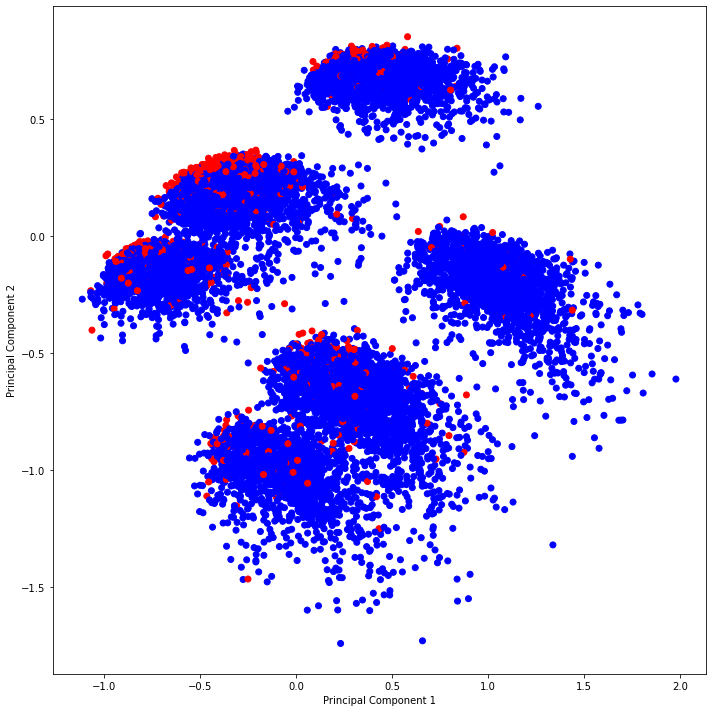

In [56]:
%matplotlib inline
fig = plt.figure(figsize = (10,10))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'blue',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

LogisticRegression model with PCA
Now lets do the modeling with selected 40 pca feature
We also needs to do the class imbalance with class_width = balanced

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca,y_train)

In [58]:
pred_pro_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_pro_test))

'0.97'

In [59]:
#Making prediction on the test data
pred_test = model_pca.predict_proba(df_test_pca)
y_pred_default = model_pca.predict(df_test_pca)

In [60]:
# print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[7239  940]
 [  39  776]]
0.8911496553257727


In [61]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)

y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [62]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.9652427247094721


# ROC curve

In [63]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

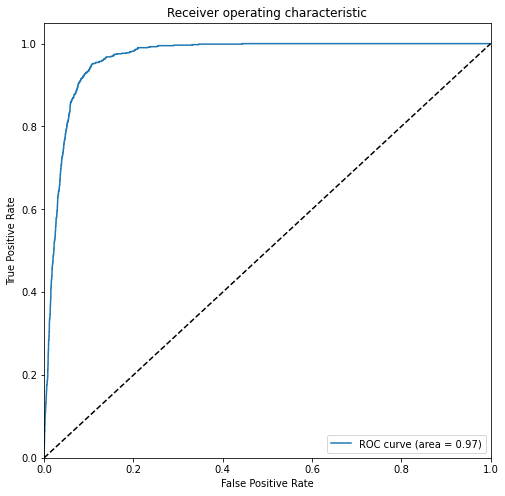

(array([0.        , 0.        , 0.        , ..., 0.99975547, 0.99987774,
        1.        ]),
 array([0.        , 0.00122699, 0.00245399, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99974091e+00, 9.99740913e-01, 9.99653605e-01, ...,
        4.23568263e-14, 8.30445989e-15, 3.05767475e-15]))

In [64]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [65]:
# Let's create columns with different probability threshhold 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000315,1,0,0,0,0,0,0,0,0,0
1,0,0.029017,1,0,0,0,0,0,0,0,0,0
2,0,0.051461,1,0,0,0,0,0,0,0,0,0
3,0,0.431353,1,1,1,1,1,0,0,0,0,0
4,0,0.088895,1,0,0,0,0,0,0,0,0,0


Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

In [66]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
thresh_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    thresh_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(thresh_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.090616     0.000000     1.000000
0.1   0.1  0.717034     0.689204     0.996319
0.2   0.2  0.796197     0.776868     0.990184
0.3   0.3  0.838559     0.824795     0.976687
0.4   0.4  0.869135     0.859274     0.968098
0.5   0.5  0.891150     0.885072     0.952147
0.6   0.6  0.912164     0.911114     0.922699
0.7   0.7  0.927841     0.932877     0.877301
0.8   0.8  0.936958     0.953540     0.770552
0.9   0.9  0.935624     0.977748     0.512883


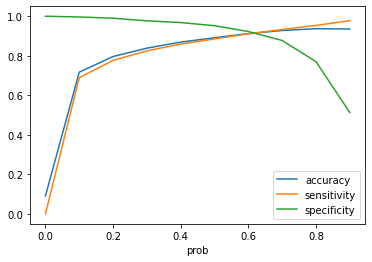

In [67]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
thresh_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])

In [68]:
## Finidng the optimal threshhold
import sys
def Find_Optimal_threshhold(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Optimal_threshhold(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  [0.6257891220928397]


In [69]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

y_pred_final.churn.value_counts()

0    8179
1     815
Name: churn, dtype: int64

## lets calculate the confusion matrix

In [70]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[7207,  972],
       [  37,  778]], dtype=int64)

# Logistic regression model with PCA:-

In [71]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score on test data= ', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity=', TP / float(TP+FN))

#  calculate specificity
print('Specificity= ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate= ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value= ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value= ',TN / float(TN+ FN))

# Misclassification rate

print('Misclassification Rate= ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data=  0.8911496553257727
Sensitivity= 0.9546012269938651
Specificity=  0.8811590659004769
false postive rate=  0.11884093409952316
positive predictive value=  0.44457142857142856
Negative predictive value=  0.9948923246824959
Misclassification Rate=  0.11218590171225261


# LogistcRegression model with RFE
As we have seen with PCA we select 40 component.
We are selecting 10 feature from RFE

In [72]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)       
rfe = rfe.fit(X_norm,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[ True  True  True  True  True False False False  True False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False  True False False False False False False False False False  True
 False False False False False]
[ 1  1  1  1  1 11 38 30  1 23  2 26 35 33 49 43 54 20 55 22 56  1 46 24
  3 41  8 19 25 34 28  6  9 45 52 15 47 42 27 13 21 39 12  4 44 14  1 37
 53  1 18  5 17  7 16 51 10 29 32  1 50 40 48 36 31]


In [73]:
col=X_train.columns[rfe.support_]
col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'offnet_mou_6',
       'roam_ic_mou_8', 'spl_og_mou_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'total_usage_col'],
      dtype='object')

In [74]:
import statsmodels.api as sm

def vif_calculate(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

# correlation matrix

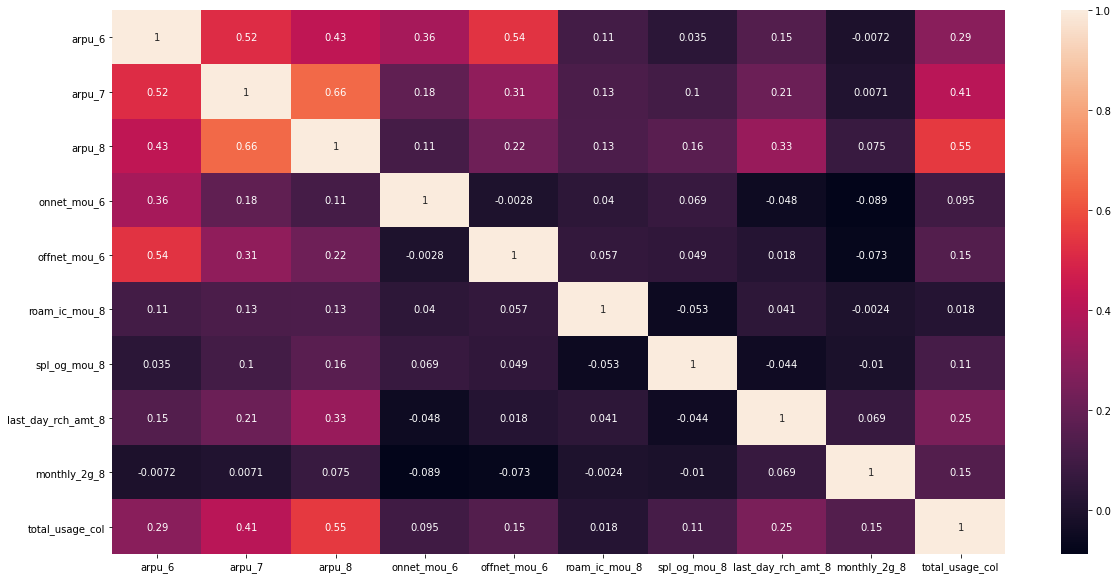

In [75]:
plt.figure(figsize=(20,10))
sns.heatmap(X_norm[col].corr(),annot=True)
colors=["g"]

## VIF value

In [76]:
col_vif = list(col)
col_vif.append('churn')
vif_calculate(input_data=telecom_4[col_vif], dependent_col='churn')

,Var,Vif
0,arpu_6,7.80
1,arpu_7,7.38
2,arpu_8,6.91
9,total_usage_col,3.23
4,offnet_mou_6,3.02
3,onnet_mou_6,1.91
7,last_day_rch_amt_8,1.90
6,spl_og_mou_8,1.28
8,monthly_2g_8,1.14
5,roam_ic_mou_8,1.10


In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(class_weight='balanced')
logsk.fit(X_train[col], y_train)

LogisticRegression(class_weight='balanced')

## ROC_AUC CURVE

In [78]:
#Making prediction on the test data
pred_pro_test = logsk.predict_proba(X_test[col])[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_pro_test))

'0.99'

In [79]:
#lets make prediction on data
pred_test = logsk.predict_proba(X_test[col])
y_pred_default = logsk.predict(X_test[col])

In [80]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score : ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      8179
           1       0.54      1.00      0.70       815

    accuracy                           0.92      8994
   macro avg       0.77      0.96      0.83      8994
weighted avg       0.96      0.92      0.93      8994

[[7486  693]
 [   1  814]]
accuracy_score :  0.9228374471870135


In [81]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [82]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score: ',roc_auc)

ROC_AUC Score:  0.9897587492133454


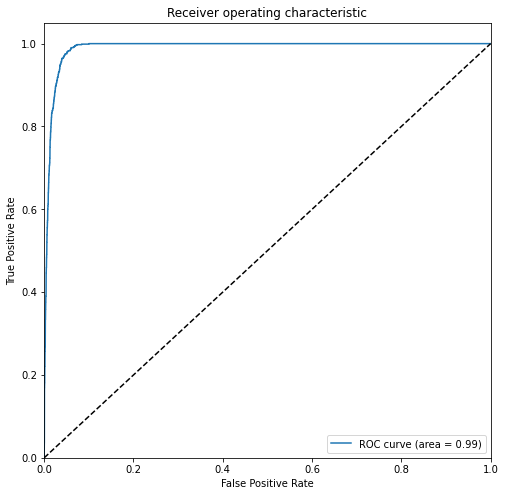

(array([0.        , 0.        , 0.        , ..., 0.99975547, 0.99987774,
        1.        ]),
 array([0.        , 0.00122699, 0.00245399, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99419554e+00, 9.94195537e-01, 9.93274222e-01, ...,
        2.14810131e-19, 1.96067144e-19, 1.15281332e-19]))

In [83]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [84]:
# Let's create columns with different probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000002,1,0,0,0,0,0,0,0,0,0
1,0,0.006127,1,0,0,0,0,0,0,0,0,0
2,0,0.031116,1,0,0,0,0,0,0,0,0,0
3,0,0.069327,1,0,0,0,0,0,0,0,0,0
4,0,0.000389,1,0,0,0,0,0,0,0,0,0


In [85]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
new_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    thresh_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(thresh_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.090616     0.977748     0.512883
0.1   0.1  0.797865     0.977748     0.512883
0.2   0.2  0.852902     0.977748     0.512883
0.3   0.3  0.884923     0.977748     0.512883
0.4   0.4  0.906271     0.977748     0.512883
0.5   0.5  0.922837     0.977748     0.512883
0.6   0.6  0.938626     0.977748     0.512883
0.7   0.7  0.951301     0.977748     0.512883
0.8   0.8  0.964421     0.977748     0.512883
0.9   0.9  0.952302     0.977748     0.512883


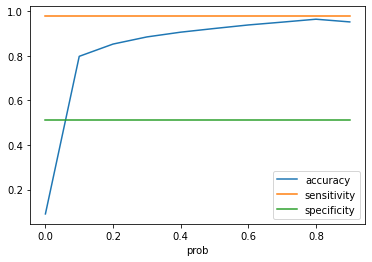

In [86]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
thresh_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])

In [87]:
## Finidng the optimal cutoff
def Find_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.loc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])

# Find optimal probability threshold
threshold = Find_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('CutOff threshold: ', threshold)

CutOff threshold:  [0.7615175222876811]


In [88]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

y_pred_final.churn.value_counts()

0    8179
1     815
Name: churn, dtype: int64

In [89]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[7468,  711],
       [   1,  814]], dtype=int64)

In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score : ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

Accuracy Score :  0.9228374471870135
Sensitivity:  0.9987730061349693
Specificity:  0.9130700574642376
false postive rate:  0.08692994253576232
positive predictive value:  0.5337704918032787
Negative predictive value:  0.9998661132681751


As we can see Above LogisticRegression giving good Accuracy with PCA and with RFE
With PCA
Accuracy Score on test data: 0.8110962864131643
Sensitivity: 0.8098159509202454
Specificity: 0.8057219709010881
false postive rate: 0.19427802909891184
positive predictive value: 0.2934637616718542
Negative predictive value: 0.9770200148257969
Misclassification Rate: 0.1939070491438737
With RFE
Accuracy Score : 0.811985768289971
Sensitivity: 0.8122699386503067
Specificity: 0.8049883848881282
false postive rate: 0.19501161511187187
positive predictive value: 0.2933097031457687
Negative predictive value: 0.9772895947751224

## DecisionTreeClassifier With PCA

In [91]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# Here max_depth which is 5 so  we can plot and read the tree.
dt_1 = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_1.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [92]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_1 = dt_1.predict(df_test_pca)

# # Printing classification report
# print(classification_report(y_test, y_pred_default))

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_1))
print(confusion_matrix(y_test,y_pred_1))
print('Acuracy Score', accuracy_score(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      8179
           1       0.25      0.66      0.36       815

    accuracy                           0.79      8994
   macro avg       0.60      0.73      0.62      8994
weighted avg       0.90      0.79      0.83      8994

[[6555 1624]
 [ 277  538]]
Acuracy Score 0.7886368690237936


In [93]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.9228374471870135
Sensitivity:  0.9987730061349693
Specificity:  0.9152708155031177
false postive rate:  0.08472918449688226
positive predictive value:  0.5401459854014599
Negative predictive value:  0.9998664351542674
Misclassification Rate:  0.07716255281298644


# Let's try for Random Forest

In [94]:
# Random forest

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(df_train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(df_test_pca)

In [95]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[8148,   31],
       [ 737,   78]], dtype=int64)

In [96]:
TN = confusion_rf[0,0]  
TP = confusion_rf[1,1]
FP = confusion_rf[0,1] 
FN = confusion_rf[1,0] 

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.09570552147239264
Specificity:  0.9962098055997065
false postive rate:  0.0037901944002934345
positive predictive value:  0.7155963302752294
Negative predictive value:  0.9170512099043332
Misclassification Rate:  0.08539026017344896
